# hiEEG

In [136]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [182]:
def load_hiEEG_data(subject, session, folder='data/hiEEG'):
    "Load data for `subject` and `session` from `folder`"
    # Refer to https://gin.g-node.org/USZ_NCH/Human_MTL_units_scalp_EEG_and_iEEG_verbal_WM/src/master/code_MATLAB/Load_Data_Example_Script.m for structure
    # Formatting
    file_string = f'Data_Subject_{subject:02d}_Session_{session:02d}'

    # Load file
    f = h5py.File(os.path.join(folder, file_string) + '.h5', 'r')

    # Extract data
    data, meta = [], []
    data_arrays = f['data'][file_string]['data_arrays']
    trial_prefix = 'iEEG_Data_'
    trial_keys = [k for k in data_arrays.keys() if trial_prefix in k]
    for trial_key in trial_keys:
        # Setup
        sampling_meta = data_arrays[trial_key]['dimensions']['2'].attrs
        trial_meta = f['metadata']['Session']['sections']['Trial properties']['sections'][trial_key[len(trial_prefix):]]['properties']

        # Get data
        waveform = np.array(data_arrays[trial_key]['data'])
        time = np.arange(waveform.shape[1]) * sampling_meta['sampling_interval'] + sampling_meta['offset']
        electrode_names = np.array(data_arrays[trial_key]['dimensions']['1']['labels']).astype(str)

        # Get meta
        set_size = trial_meta['Set size'][0][0]
        correct = trial_meta['Correct'][0][0]
        response_time = trial_meta['Response time'][0][0]

        # Record
        data.append({'time': time, 'waveform': waveform, 'electrode names': electrode_names})
        meta.append({'set size': set_size, 'correct': correct, 'response_time': response_time})
    
    # Return
    return data, meta


# Load data
data, meta = load_hiEEG_data(1, 1)

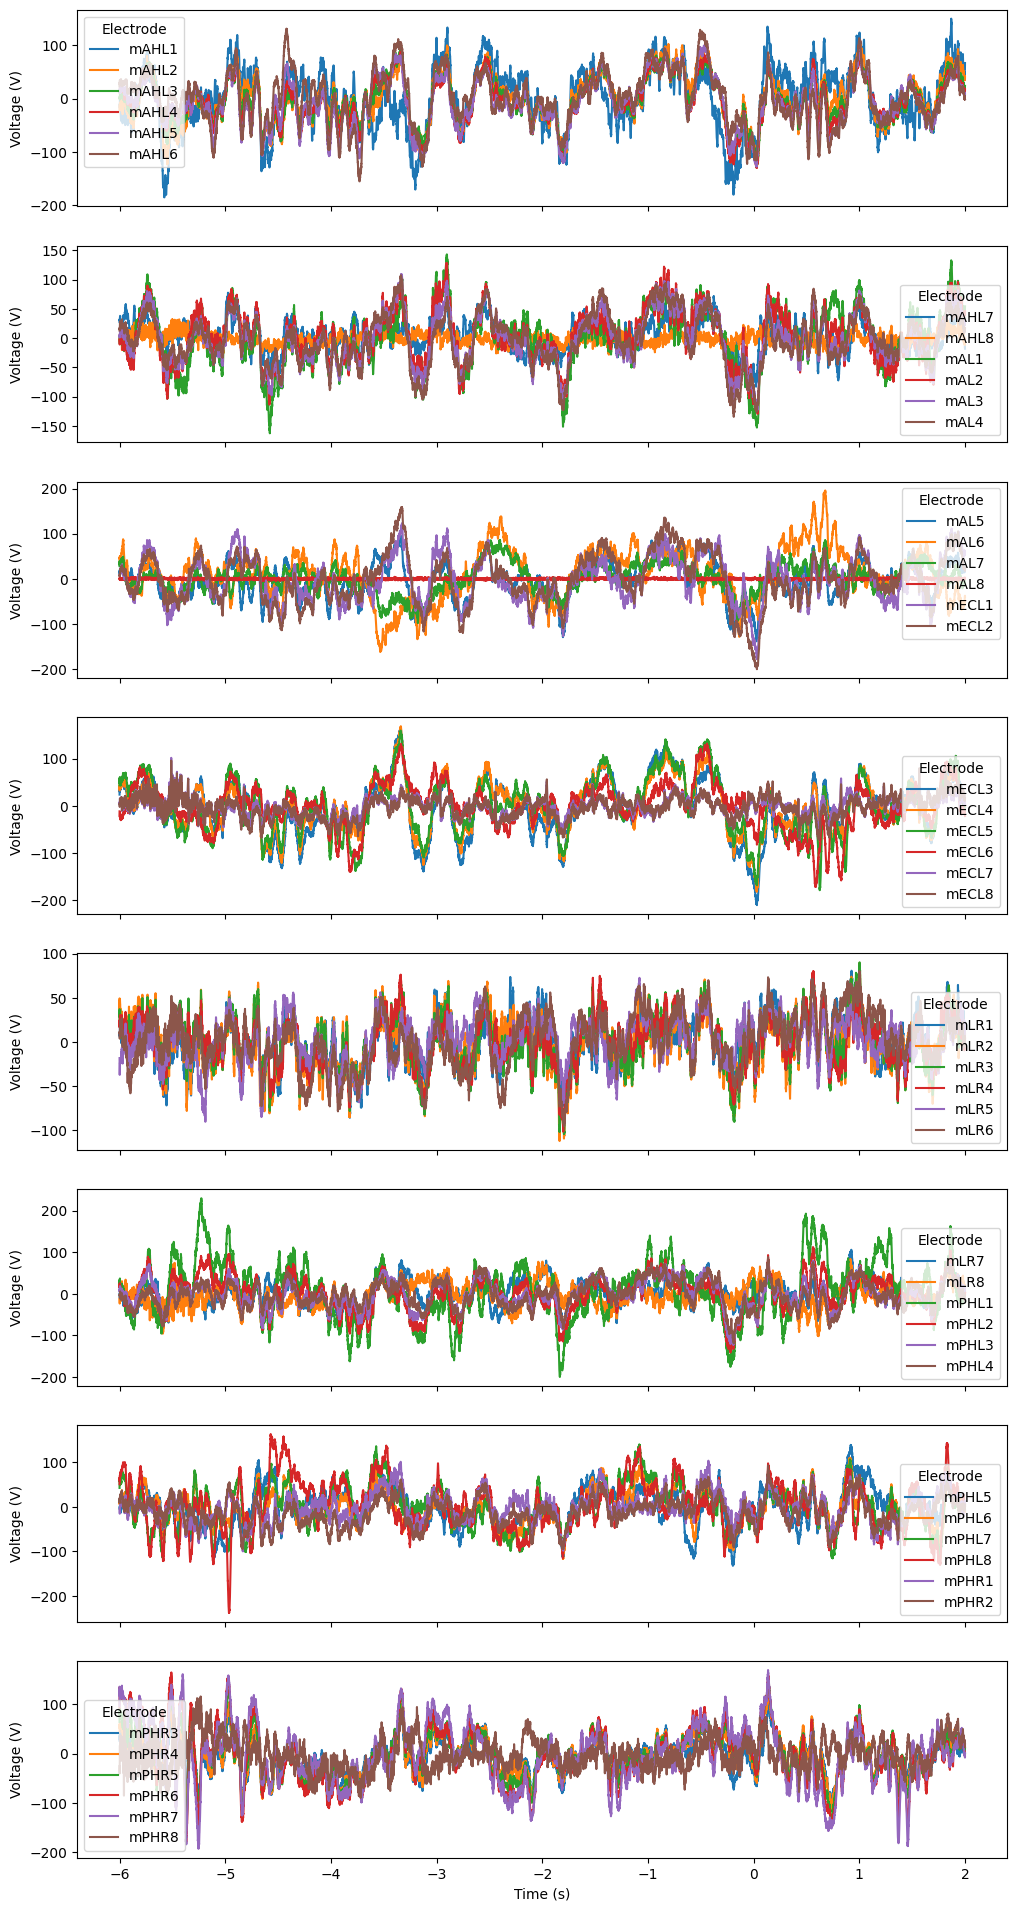

In [154]:
time, waveform, electrode_names = data[0]
split = 8
fig, axs = plt.subplot_mosaic([4*[i] for i in range(split)], figsize=(12, split*3), sharex=True)
df = (
    pd.DataFrame(waveform, index=electrode_names, columns=time)
        .reset_index(names='Electrode')
        .melt(id_vars='Electrode', var_name='Time (s)', value_name='Voltage (V)')
)
for i in range(split):
    sns.lineplot(
        data=df.loc[df['Electrode'].map(lambda x: x in electrode_names[int(i*electrode_names.shape[0]/split):int((i+1)*electrode_names.shape[0]/split)])],
        x='Time (s)',
        y='Voltage (V)',
        hue='Electrode',
        ax=axs[i])

In [184]:
meta

[{'set size': 8.0, 'correct': 1.0, 'response_time': 2.484},
 {'set size': 4.0, 'correct': 1.0, 'response_time': 1.66775},
 {'set size': 8.0, 'correct': 1.0, 'response_time': 1.472},
 {'set size': 6.0, 'correct': 1.0, 'response_time': 1.30875},
 {'set size': 8.0, 'correct': 1.0, 'response_time': 1.51625},
 {'set size': 4.0, 'correct': 1.0, 'response_time': 0.899},
 {'set size': 8.0, 'correct': 1.0, 'response_time': 1.132},
 {'set size': 8.0, 'correct': 1.0, 'response_time': 1.58025},
 {'set size': 4.0, 'correct': 1.0, 'response_time': 0.8845},
 {'set size': 6.0, 'correct': 1.0, 'response_time': 0.943},
 {'set size': 8.0, 'correct': 1.0, 'response_time': 1.4325},
 {'set size': 6.0, 'correct': 1.0, 'response_time': 1.6255},
 {'set size': 4.0, 'correct': 1.0, 'response_time': 1.005},
 {'set size': 8.0, 'correct': 0.0, 'response_time': 3.138},
 {'set size': 4.0, 'correct': 1.0, 'response_time': 1.0215},
 {'set size': 6.0, 'correct': 1.0, 'response_time': 1.202},
 {'set size': 4.0, 'correct'